# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


matplotlib

In [3]:
num_year = data.groupby('year').sum('passengers')

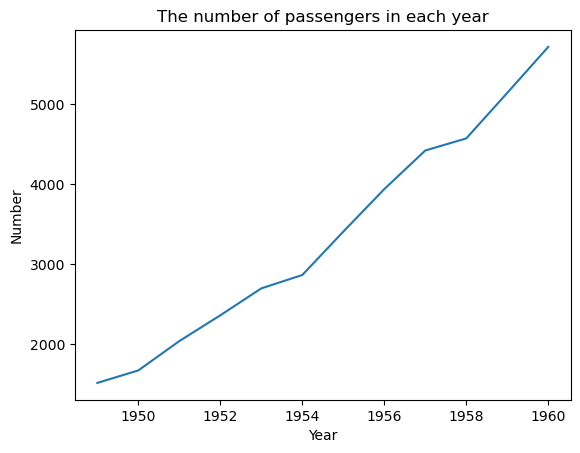

In [4]:
x = num_year.index
y = num_year.values
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('The number of passengers in each year')
plt.show()

In [5]:
num_month = data.groupby('month')['passengers'].sum('passengers')

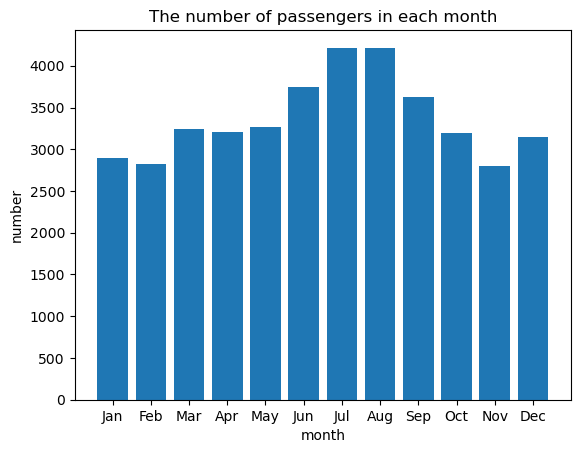

In [6]:
x = num_month.index
y = num_month.values
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('number')
plt.title('The number of passengers in each month')
plt.show()

seaborn

Text(0.5, 1.0, 'The number of passengers in each year')

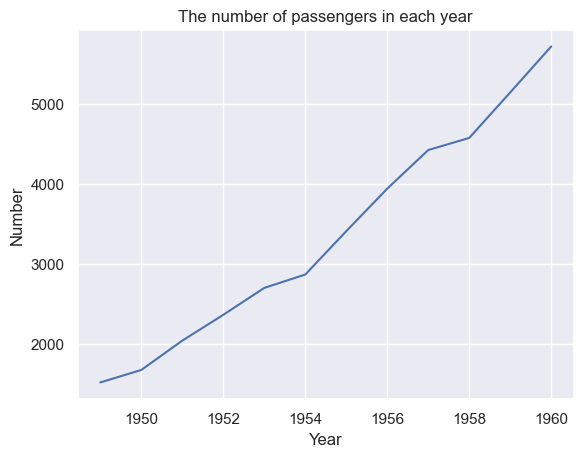

In [7]:
sns.set()
num_year = data.groupby('year').sum('passengers')
sns.lineplot(data = num_year, x = 'year', y = 'passengers')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('The number of passengers in each year')

Text(0.5, 1.0, 'The number of passengers in each month')

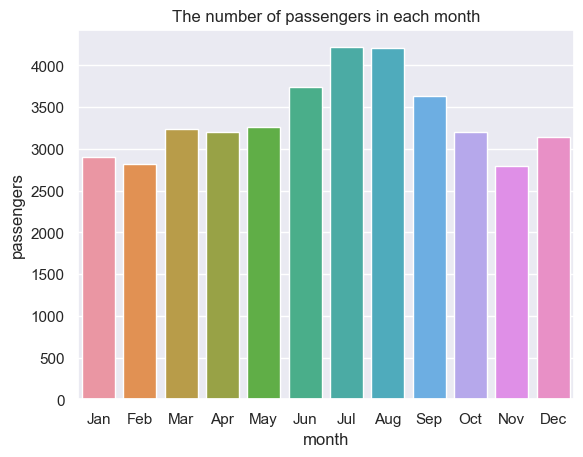

In [8]:
sns.set()
sns.barplot(data, x="month", y="passengers", estimator="sum", errorbar=None)
plt.title('The number of passengers in each month')

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [9]:
data2 = sns.load_dataset("iris")
data2.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


matplotlib

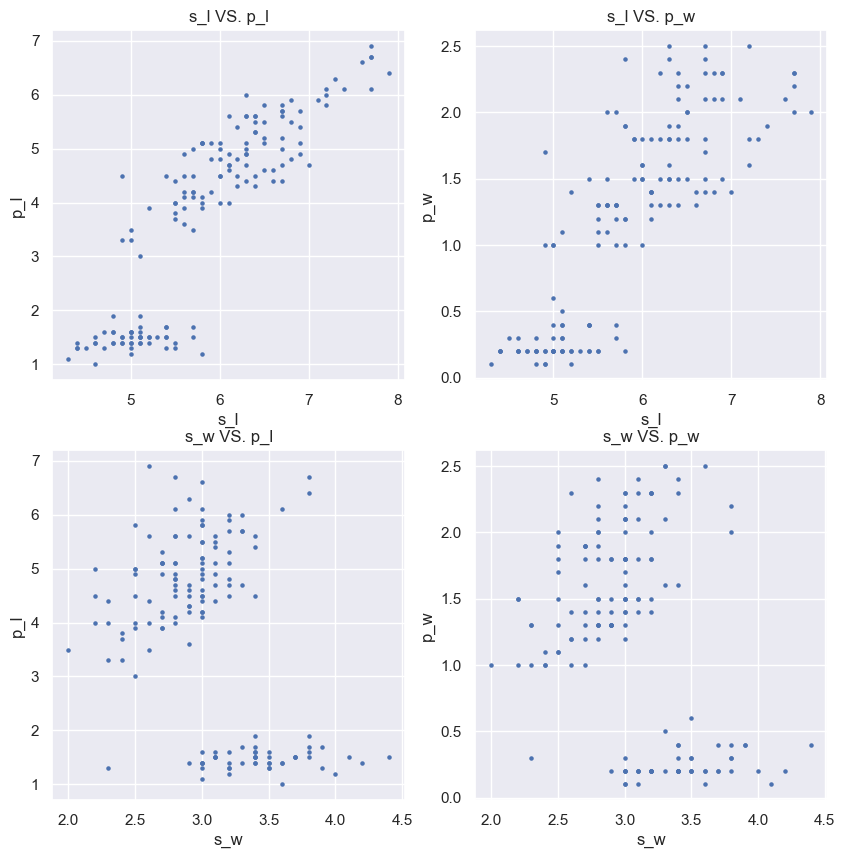

In [10]:
fig = plt.figure(figsize=(10, 10)) 
  
# setting values to rows and column variables 
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.scatter(data2['sepal_length'], data2['petal_length'], s = 5)
plt.title('s_l VS. p_l')
plt.xlabel('s_l')
plt.ylabel('p_l')

fig.add_subplot(rows, columns, 2) 
plt.scatter(data2['sepal_length'], data2['petal_width'], s = 5)
plt.title('s_l VS. p_w')
plt.xlabel('s_l')
plt.ylabel('p_w')

fig.add_subplot(rows, columns, 3) 
plt.scatter(data2['sepal_width'], data2['petal_length'], s = 5)
plt.title('s_w VS. p_l')
plt.xlabel('s_w')
plt.ylabel('p_l')

fig.add_subplot(rows, columns, 4) 
plt.scatter(data2['sepal_width'], data2['petal_width'], s = 5)
plt.title('s_w VS. p_w')
plt.xlabel('s_w')
plt.ylabel('p_w')

plt.show()

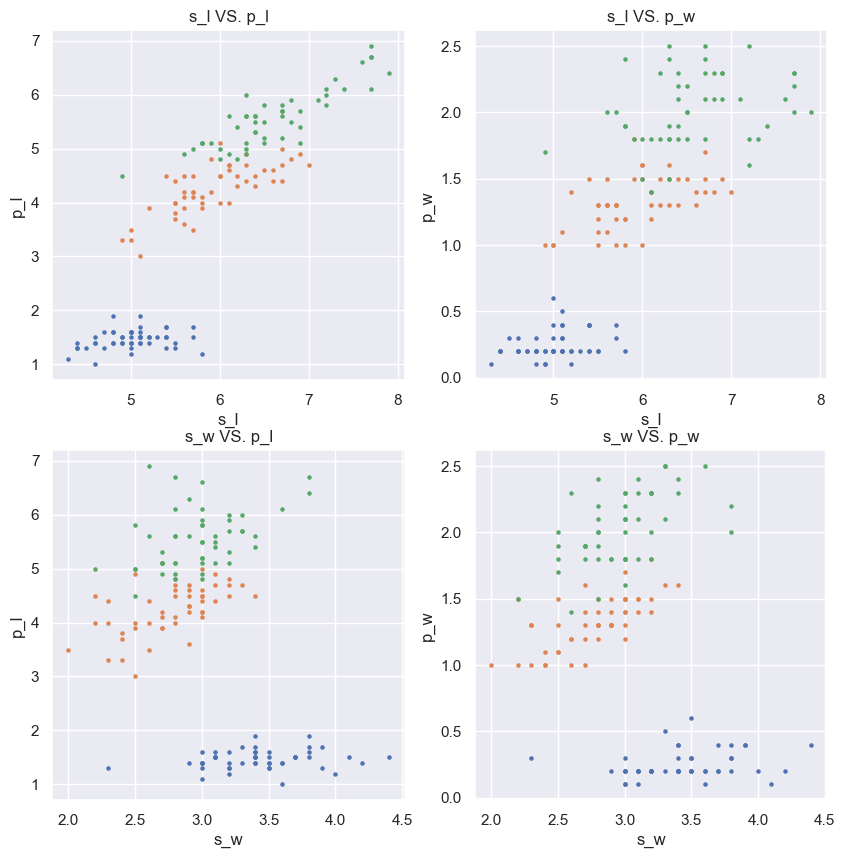

In [11]:
groups = data2.groupby('species')

fig = plt.figure(figsize=(10, 10)) 
  
# setting values to rows and column variables 
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1) 
for name, group in groups:
    plt.scatter(group.sepal_length, group.petal_length, s = 5, label = name)
    plt.title('s_l VS. p_l')
    plt.xlabel('s_l')
    plt.ylabel('p_l')
    
fig.add_subplot(rows, columns, 2) 
for name, group in groups:
    plt.scatter(group.sepal_length, group.petal_width, s = 5, label = name)
    plt.title('s_l VS. p_w')
    plt.xlabel('s_l')
    plt.ylabel('p_w')

fig.add_subplot(rows, columns, 3) 
for name, group in groups:
    plt.scatter(group.sepal_width, group.petal_length, s = 5, label = name)
    plt.title('s_w VS. p_l')
    plt.xlabel('s_w')
    plt.ylabel('p_l')

fig.add_subplot(rows, columns, 4)
for name, group in groups:
    plt.scatter(group.sepal_width, group.petal_width, s = 5, label = name)
    plt.title('s_w VS. p_w')
    plt.xlabel('s_w')
    plt.ylabel('p_w')

plt.show()

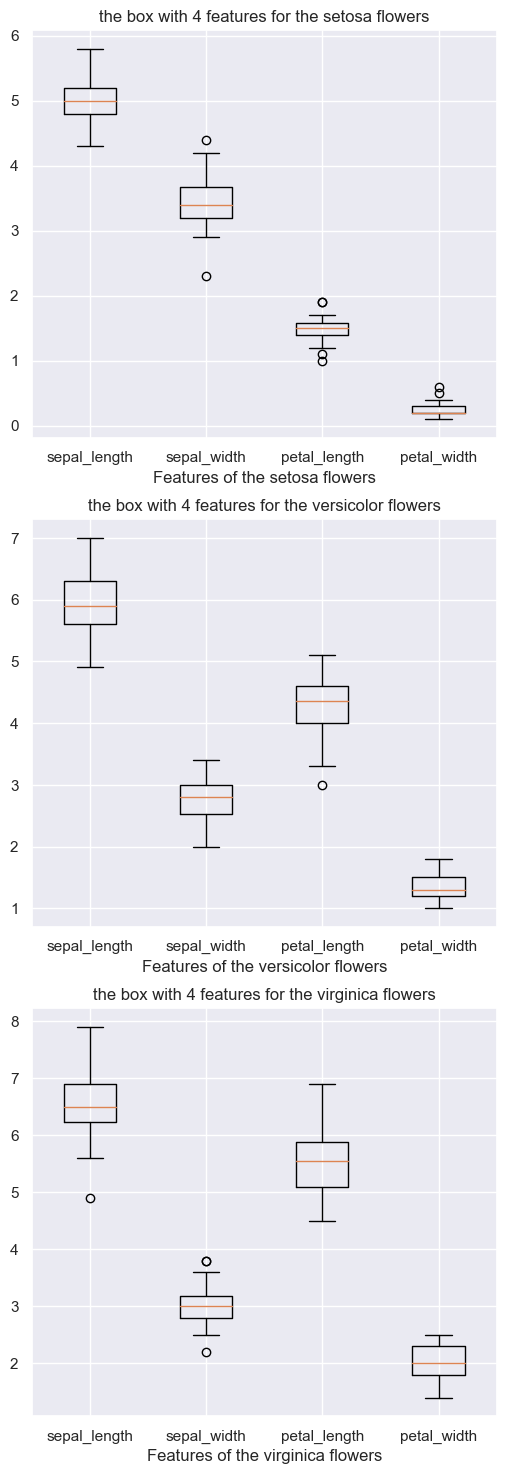

In [12]:
nums = 1
rows = 3
columns = 1

plt.figure(figsize = (6,18))
for i in set(data2['species']):
    #fig.add_subplot(rows, columns, nums)
    plt.subplot(rows, columns, nums)
    nums = nums+1
    data = data2[data2['species']==i].drop('species',axis=1)
    labels = data.columns
    plt.title("the box with 4 features for the " +i+" flowers")
    plt.xlabel("Features of the "+i+" flowers")
    plt.boxplot(data, labels = labels)

seaborn

In [13]:
data2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


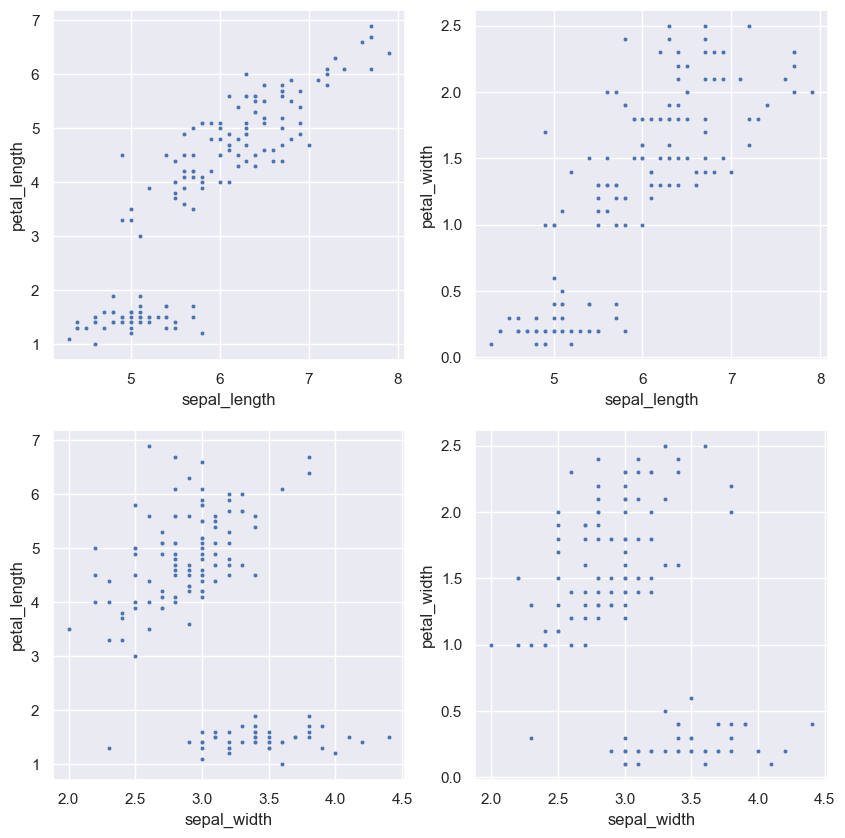

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='petal_length', data=data2, s=10) 
plt.subplot(2,2,2)
sns.scatterplot(x='sepal_length', y='petal_width', data=data2, s=10) 
plt.subplot(2,2,3)
sns.scatterplot(x='sepal_width', y='petal_length', data=data2, s=10) 
plt.subplot(2,2,4)
sns.scatterplot(x='sepal_width', y='petal_width', data=data2, s=10) 
plt.show()

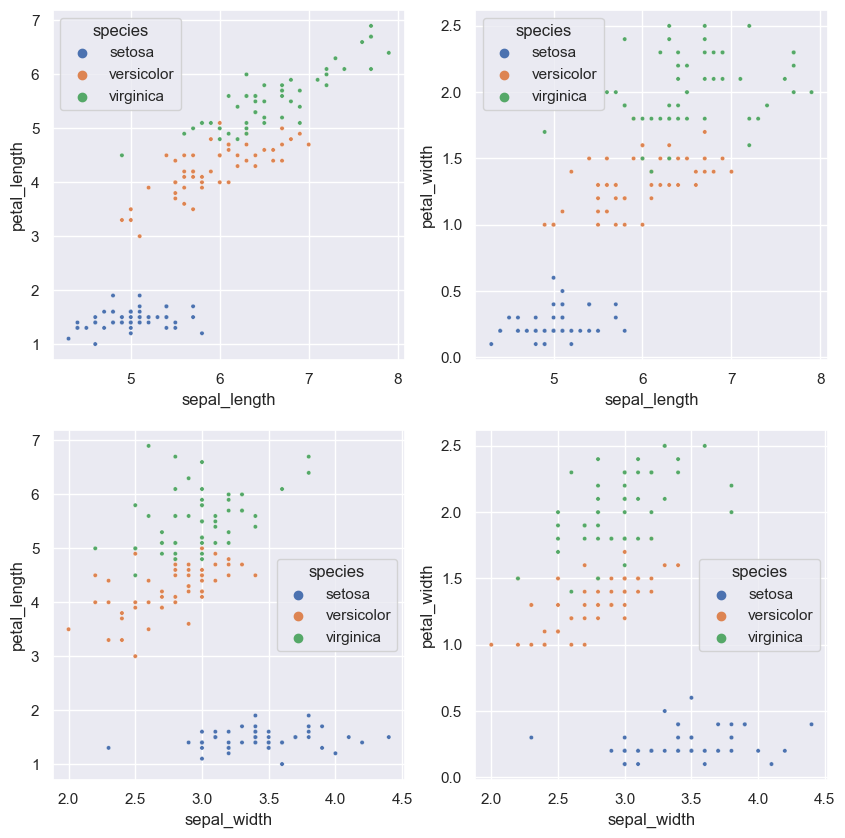

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='petal_length', data=data2, hue='species', s=10) 
plt.subplot(2,2,2)
sns.scatterplot(x='sepal_length', y='petal_width', data=data2, hue='species', s=10) 
plt.subplot(2,2,3)
sns.scatterplot(x='sepal_width', y='petal_length', data=data2, hue='species', s=10) 
plt.subplot(2,2,4)
sns.scatterplot(x='sepal_width', y='petal_width', data=data2, hue='species', s=10) 
plt.show()

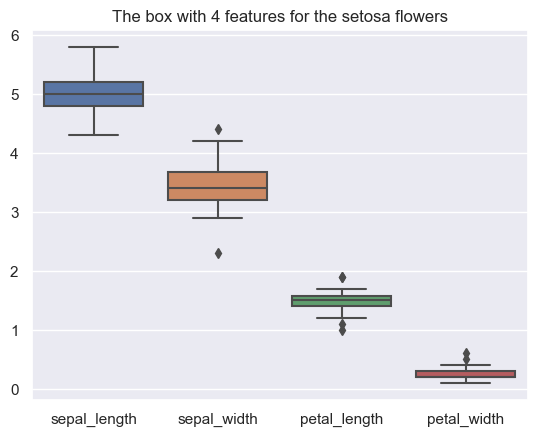

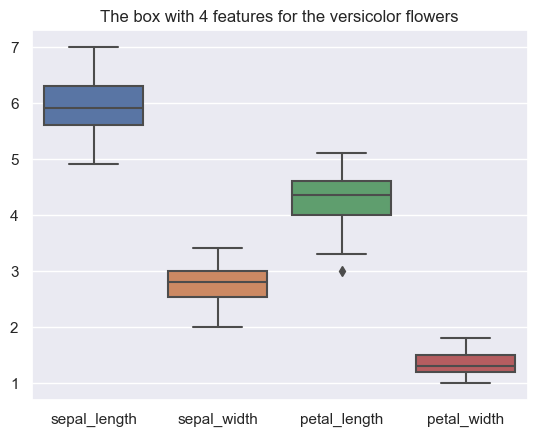

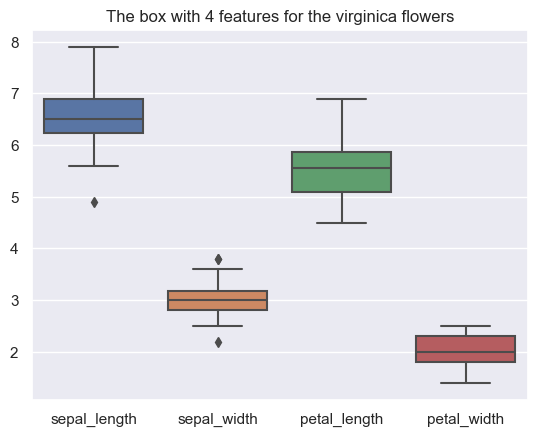

In [16]:
Species=data2["species"].unique()

for flower_spe in Species:
    SpeciesData= data2.loc[data2["species"] == flower_spe]
    sns.boxplot(data=SpeciesData.loc[:,["sepal_length", "sepal_width", "petal_length", "petal_width"]])
    plt.title(f"The box with 4 features for the {flower_spe} flowers")
    plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [17]:
data3 = sns.load_dataset("tips")
data3.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


matplotlib

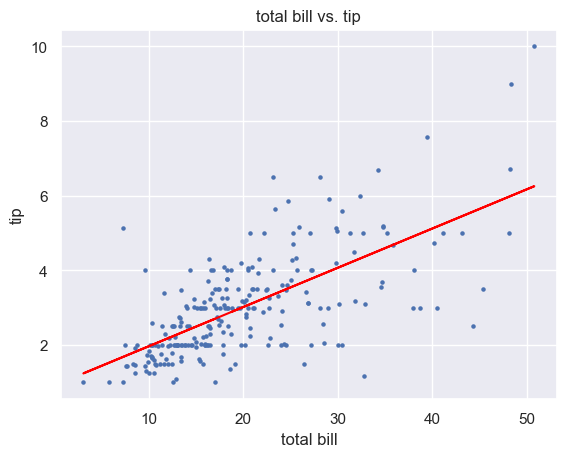

In [18]:
plt.scatter(data3['total_bill'], data3['tip'], s = 5)
slope, intercept = np.polyfit(data3.total_bill, data3.tip, 1) 
plt.plot(data3.total_bill, slope * data3.total_bill + intercept, color='red') 
plt.title('total bill vs. tip')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

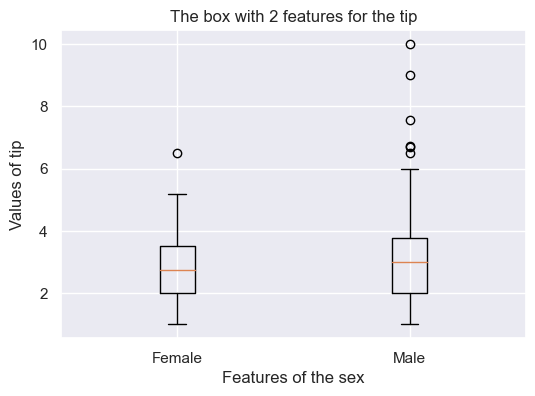

In [19]:
Data_Male = data3.loc[data3['sex'] == 'Male'] 
Data_Female = data3.loc[data3['sex'] == 'Female'] 

fig,ax = plt.subplots()
fig.set_size_inches(6, 4) # 设置图像大小
plt.xlabel("Features of the sex") 
plt.ylabel("Values of tip") 
plt.title("The box with 2 features for the tip") 
ax.boxplot([Data_Female.tip, Data_Male.tip])
ax.set_xticklabels(['Female', 'Male']) 
  
plt.show()

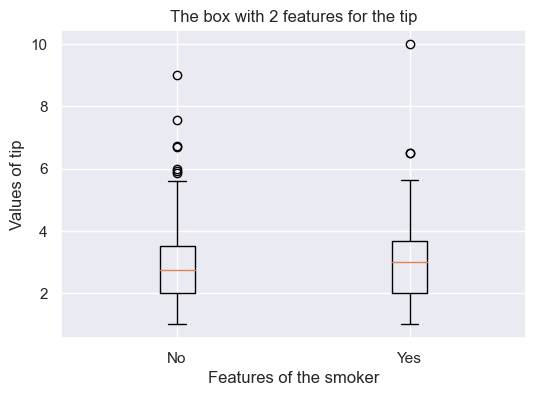

In [20]:
smoke_y = data3.loc[data3['smoker'] == 'Yes']
smoke_n = data3.loc[data3['smoker'] == 'No']

fig,ax = plt.subplots()
fig.set_size_inches(6, 4) # 设置图像大小
plt.xlabel("Features of the smoker") 
plt.ylabel("Values of tip") 
plt.title("The box with 2 features for the tip") 
ax.boxplot([smoke_n.tip, smoke_y.tip])
ax.set_xticklabels(['No', 'Yes']) 
  
plt.show()

In [21]:
Data_sun = data3[data3['day'] == 'Sun']['tip']
Data_sat = data3[data3['day'] == 'Sat']['tip']
Data_thur = data3[data3['day'] == 'Thur']['tip']
Data_fri = data3[data3['day'] == 'Fri']['tip']


Text(0, 0.5, 'Valuse of tip')

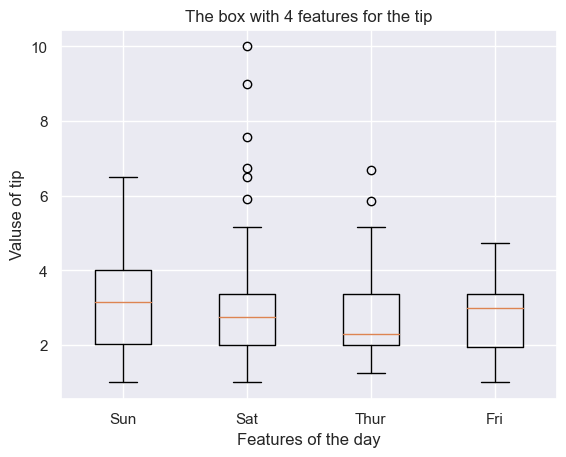

In [22]:
plt.boxplot([Data_sun, Data_sat, Data_thur, Data_fri], labels = ['Sun', 'Sat', 'Thur', 'Fri'])
plt.title("The box with 4 features for the tip")
plt.xlabel("Features of the day")
plt.ylabel("Valuse of tip")

In [23]:
data_din = data3[data3['time'] == 'Dinner']['tip']
data_lun = data3[data3['time'] == 'Lunch']['tip']

Text(0, 0.5, 'Valuse of tip')

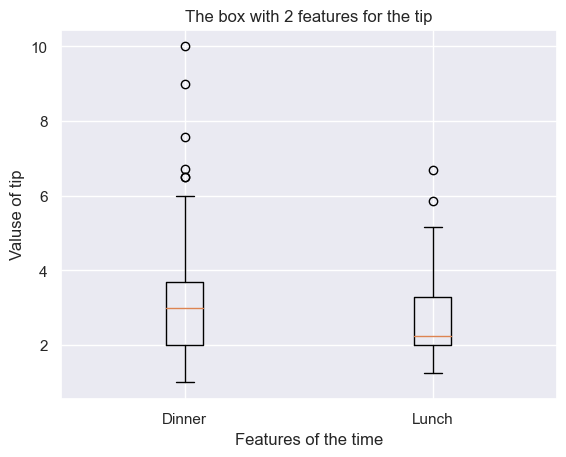

In [24]:
plt.boxplot([data_din, data_lun], labels = ['Dinner', 'Lunch'])
plt.title("The box with 2 features for the tip")
plt.xlabel("Features of the time")
plt.ylabel("Valuse of tip")

In [25]:
set(data3['size'])

{1, 2, 3, 4, 5, 6}

Text(0, 0.5, 'Values of tip')

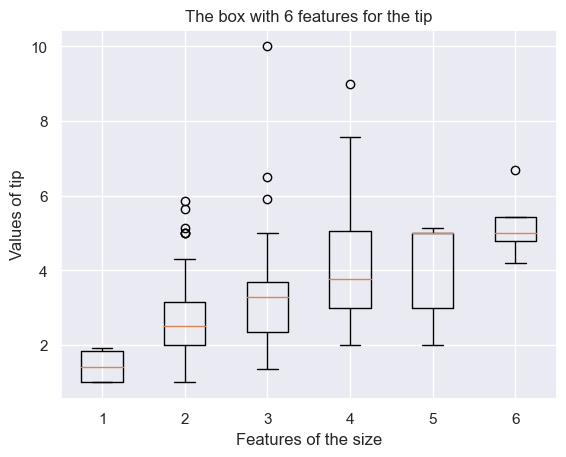

In [26]:
size_tip = []
for i in set(data3['size']):
    data3_s =data3[data3['size'] == i]['tip']
    size_tip.append(data3_s)
    
plt.boxplot(size_tip, labels = ['1', '2', '3', '4', '5', '6'])
plt.title('The box with 6 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')

In [27]:
smo_sex = data3.groupby(['sex','smoker'])['tip'].agg('mean').unstack()
smo_sex

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


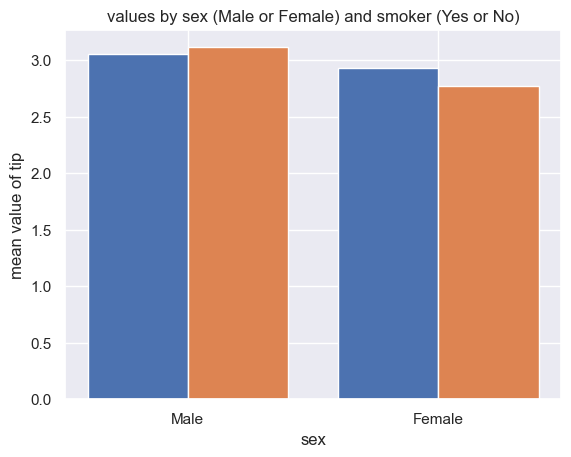

In [28]:
plt.bar([0.9,1.4],smo_sex['Yes'],width=0.2,label='yes',)
plt.bar([1.1,1.6],smo_sex['No'],width=0.2,label='no')
plt.xticks([1,1.5],['Male','Female'])

plt.xlabel('sex')
plt.ylabel('mean value of tip')
plt.title('values by sex (Male or Female) and smoker (Yes or No)')
plt.show()

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

seaborn

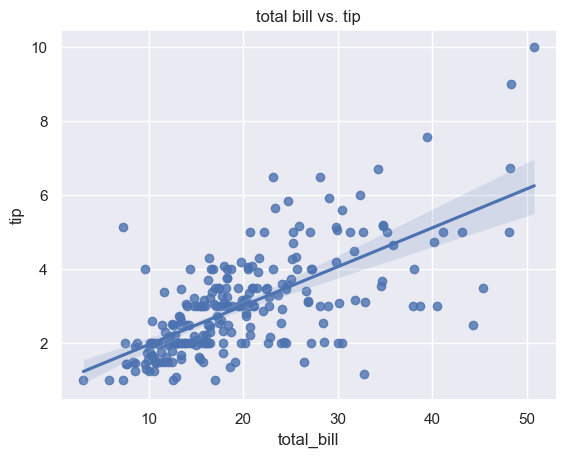

In [29]:
sns.regplot(x='total_bill', y='tip', data=data3) 
plt.title('total bill vs. tip')

plt.show()

In [30]:
data3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'Features of the sex')

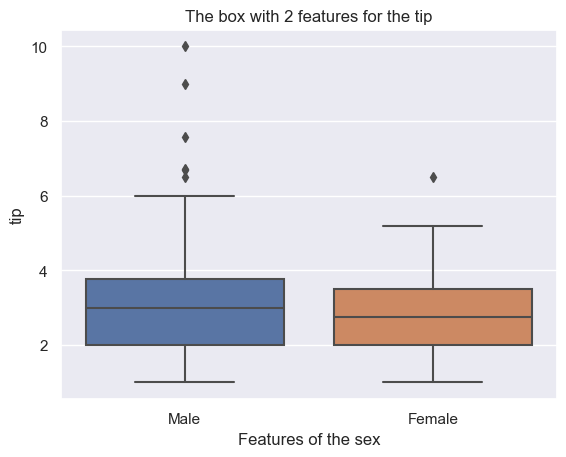

In [31]:
sns.boxplot(x="sex", y="tip", data=data3)
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the sex')

<Axes: xlabel='smoker', ylabel='tip'>

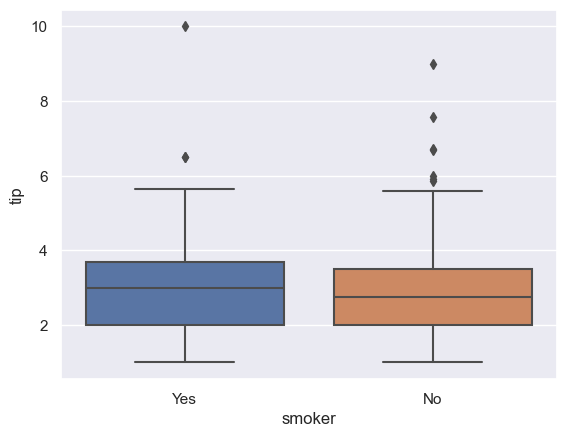

In [32]:
sns.boxplot(x="smoker", y="tip", data=data3)

Text(0.5, 1.0, 'The box with 4 features for the tip')

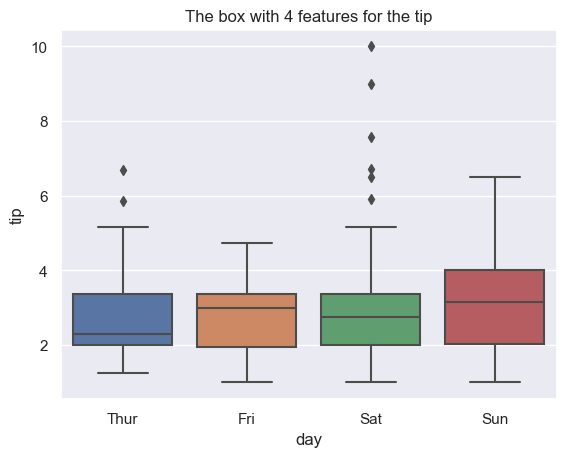

In [33]:
sns.boxplot(x='day',y='tip',data=data3)
plt.title('The box with 4 features for the tip')

Text(0.5, 1.0, 'The box with 2 features for the tip')

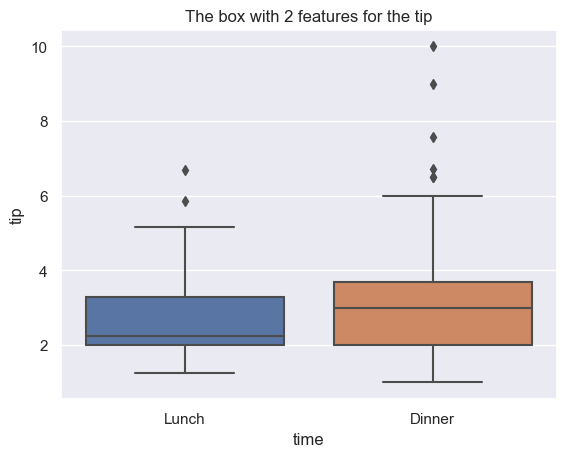

In [34]:
sns.boxplot(x='time',y='tip',data=data3)
plt.title('The box with 2 features for the tip')

<Axes: xlabel='size', ylabel='tip'>

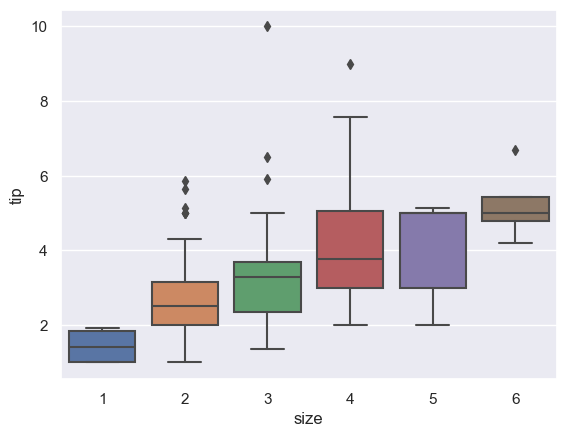

In [35]:
sns.boxplot(x='size',y='tip',data=data3)

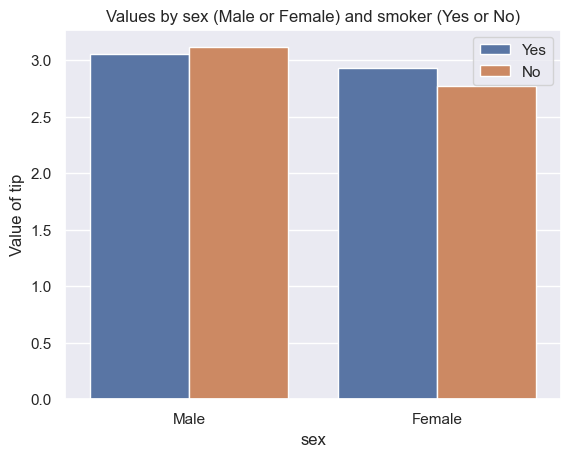

In [36]:
sns.barplot(x="sex", y="tip", hue="smoker", data=data3,errorbar=None)
plt.legend(loc = 'upper right')
plt.ylabel('Value of tip')
plt.title('Values by sex (Male or Female) and smoker (Yes or No)')
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [37]:
data4 = sns.load_dataset("titanic")
data4.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


matplotlib

In [38]:
data4_pclass = data4.groupby(['pclass'])['survived'].sum()
data4_pclass

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

In [39]:
data4['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [40]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
pclass                                                                    
1            136          80    216    216       0.629630         0.370370
2             87          97    184    184       0.472826         0.527174
3            119         372    491    491       0.242363         0.757637


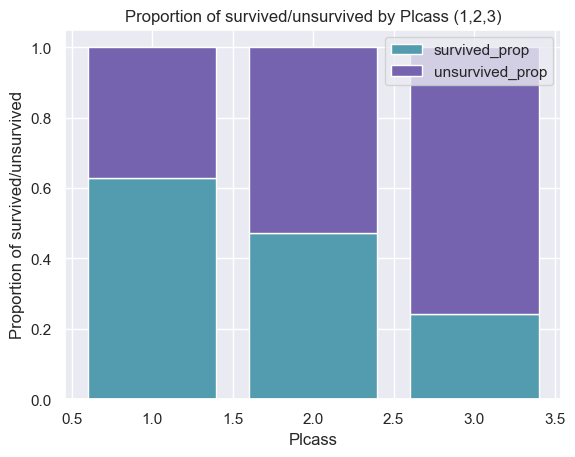

In [41]:
result = data4.groupby('pclass')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'Plcass'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1 + ' (1,2,3)')

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
sex                                                                       
female       233          81    314    314       0.742038         0.257962
male         109         468    577    577       0.188908         0.811092


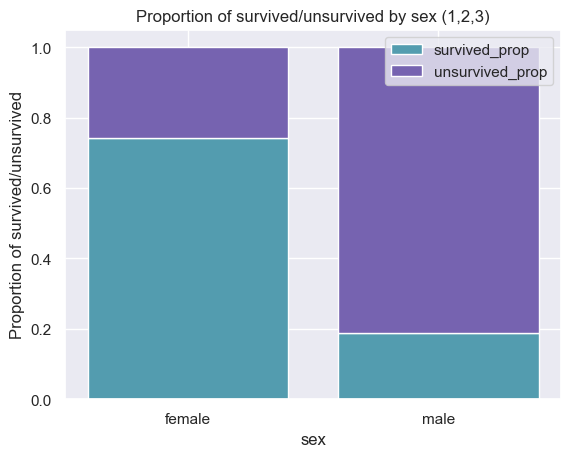

In [42]:
result = data4.groupby('sex')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'sex'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1 + ' (1,2,3)')

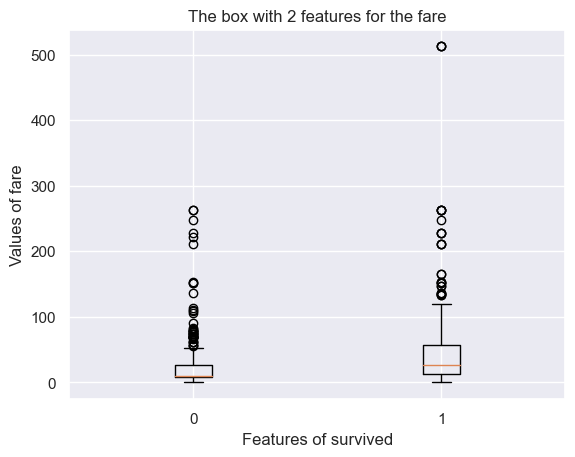

In [44]:
plt.boxplot([data4.loc[data4['survived']==0]['fare'], data4.loc[data4['survived']==1]['fare']],labels=['0','1'])
plt.xlabel('Features of survived')
plt.ylabel('Values of fare')
plt.title('The box with 2 features for the fare')
plt.show()

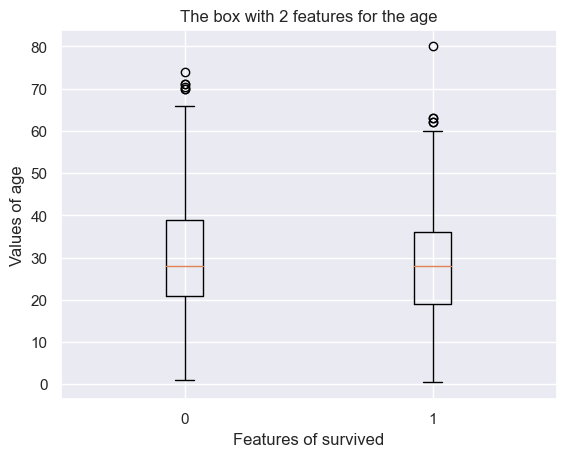

In [45]:
data4_a = data4.dropna(how = 'any',axis = 0,subset = 'age')
plt.boxplot([data4_a.loc[data4_a['survived'] == 0]['age'], data4_a.loc[data4_a['survived'] == 1]['age']],labels=['0','1'])
plt.xlabel('Features of survived')
plt.ylabel('Values of age')
plt.title('The box with 2 features for the age')
plt.show()

In [46]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

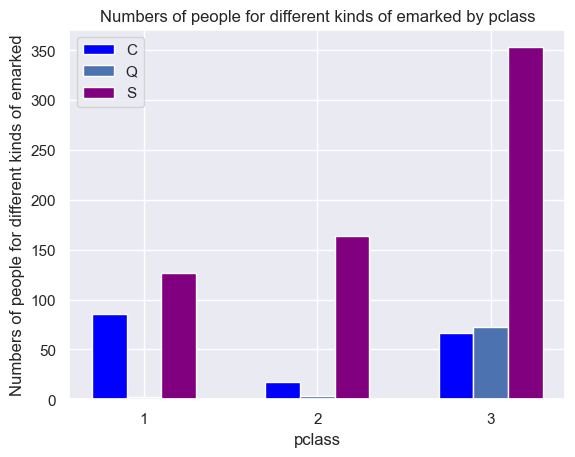

In [47]:
data4_em = data4.groupby(['pclass'])['embarked'].value_counts().unstack()
x = np.arange(1,4,1)
width = 0.2

plt.bar(x,data4_em['C'],label='C',width=width,color='blue')
plt.bar(x+width,data4_em['Q'],label='Q',width=width)
plt.bar(x+2*width,data4_em['S'],label='S',width=width,color='purple')
plt.xticks(x+width,['1','2','3'])
plt.legend(loc = 'upper left')
plt.xlabel('pclass')
plt.ylabel('Numbers of people for different kinds of emarked')
plt.title('Numbers of people for different kinds of emarked by pclass')
plt.show()

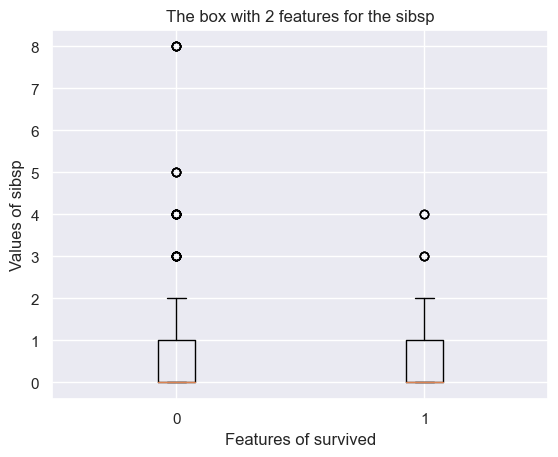

In [49]:
plt.boxplot([data4.loc[data4['survived']==0,'sibsp'], data4.loc[data4['survived']==1,'sibsp']], labels=['0','1'])
plt.xlabel('Features of survived')
plt.ylabel('Values of sibsp')
plt.title('The box with 2 features for the sibsp')
plt.show()

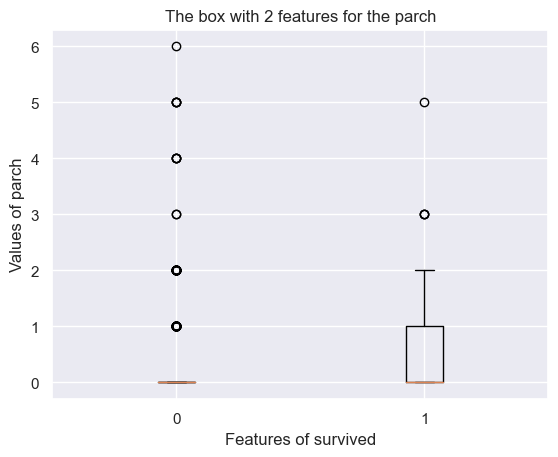

In [51]:
plt.boxplot([data4.loc[data4['survived']==0,'parch'], data4.loc[data4['survived']==1,'parch']], labels=['0','1'])
plt.xlabel('Features of survived')
plt.ylabel('Values of parch')
plt.title('The box with 2 features for the parch')
plt.show()

survived    0    1
alone             
False     175  179
True      374  163


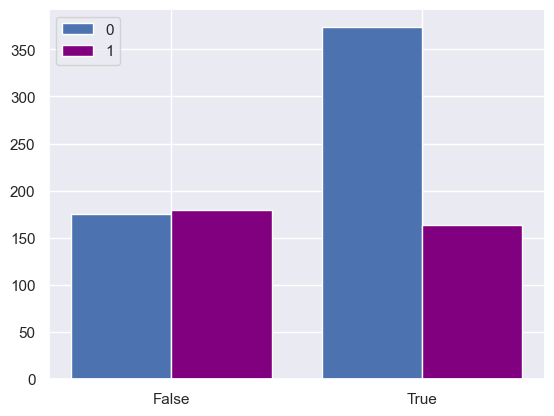

In [52]:
data_alone = data4.groupby(['alone'])['survived'].value_counts().unstack()
print(data_alone)

x=np.arange(1,3,1)
width=0.4

plt.bar(x,data_alone[0],width=width,label='0')
plt.bar(x+width,data_alone[1],width=width,color='purple',label='1')
plt.xticks(x+width/2,['False','True'])
plt.legend(loc='upper left')
plt.show()


seaborn

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

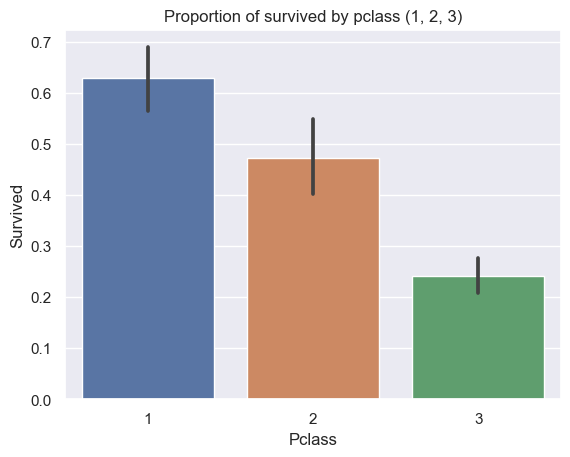

In [53]:
sns.barplot(x='pclass', y='survived', data=data4)

plt.title("Proportion of survived by pclass (1, 2, 3)")
plt.xlabel("Pclass") 
plt.ylabel("Survived") 

plt.show()

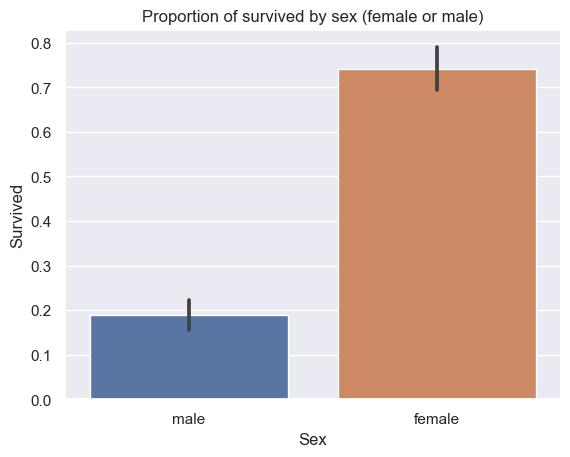

In [54]:
sns.barplot(x='sex', y='survived', data=data4)

plt.title("Proportion of survived by sex (female or male)")
plt.xlabel("Sex") 
plt.ylabel("Survived") 

plt.show()

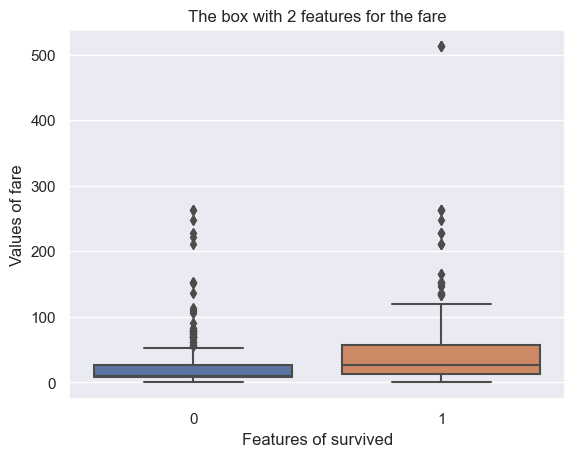

In [55]:
sns.boxplot(x = 'survived', y = 'fare', data = data4)
plt.xlabel('Features of survived')
plt.ylabel('Values of fare')
plt.title('The box with 2 features for the fare')
plt.show()

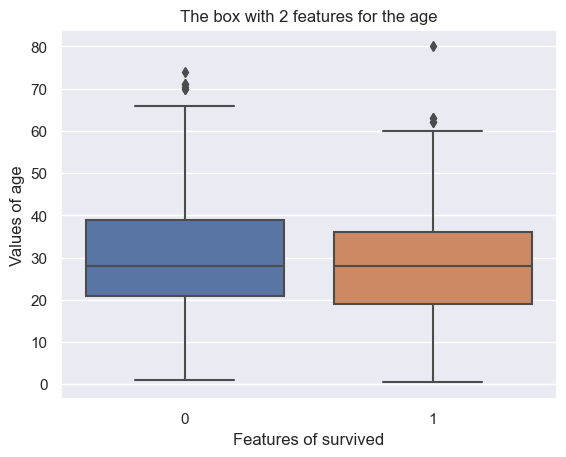

In [56]:
sns.boxplot(x = 'survived', y = 'age', data = data4)
plt.xlabel('Features of survived')
plt.ylabel('Values of age')
plt.title('The box with 2 features for the age')
plt.show()

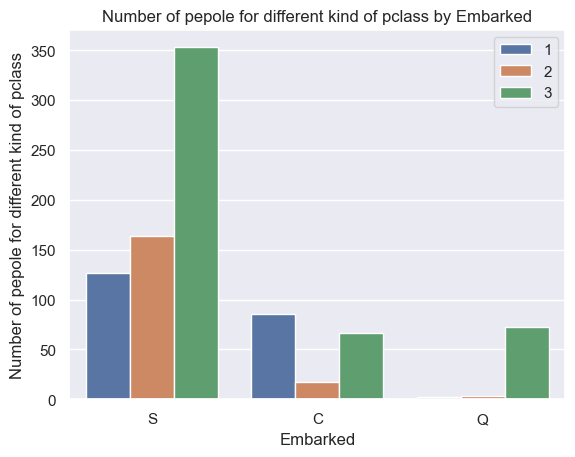

In [57]:
sns.countplot(x='embarked', data=data4, hue='pclass')

plt.title('Number of pepole for different kind of pclass by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of pepole for different kind of pclass')
plt.legend(loc='best')
plt.show()

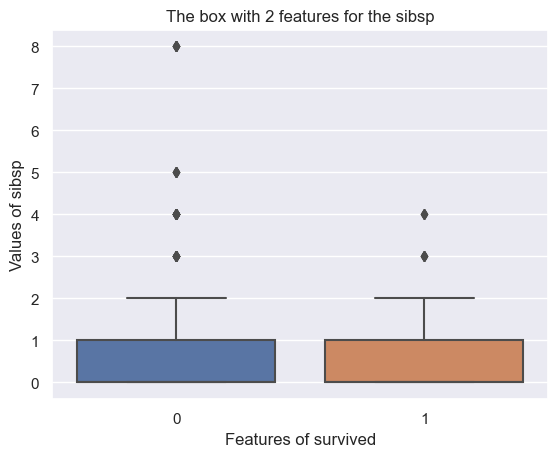

In [58]:
sns.boxplot(x="survived", y="sibsp", data=data4)
plt.xlabel('Features of survived')
plt.ylabel('Values of sibsp')
plt.title('The box with 2 features for the sibsp')
plt.show()

Text(0.5, 1.0, 'The box with 2 features for the parch')

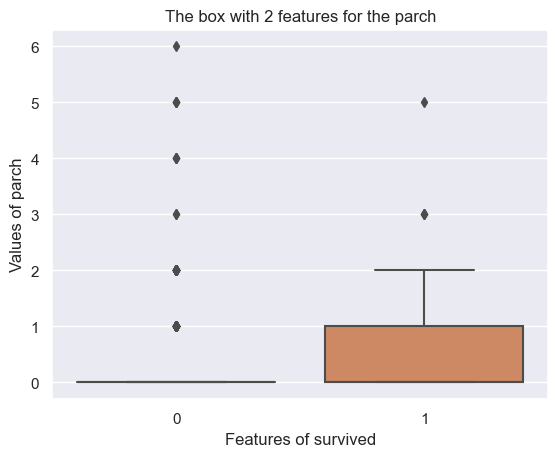

In [59]:
sns.boxplot(x="survived", y="parch", data=data4)
plt.xlabel('Features of survived')
plt.ylabel('Values of parch')
plt.title('The box with 2 features for the parch')

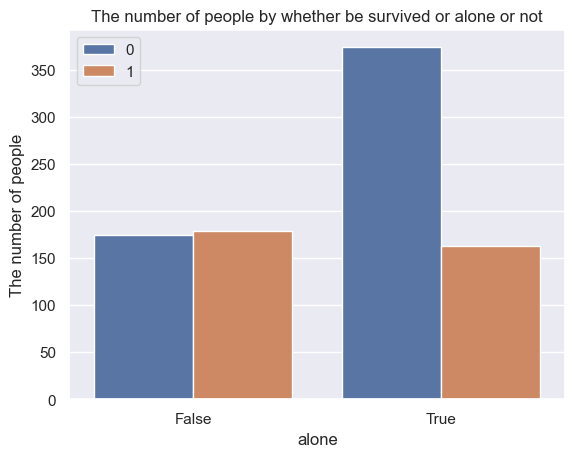

In [60]:
sns.countplot(x='alone', data=data4, hue='survived',)
plt.title('The number of people by whether be survived or alone or not')
plt.xlabel('alone')
plt.ylabel('The number of people')
plt.legend(loc='upper left')
plt.show()